In [112]:
import dill
import gensim
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

from nltk.probability import FreqDist

from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from gensim.models import FastText

from gensim.models import Word2Vec

import spacy

from gensim.models import Phrases

In [113]:
import collections

In [114]:
from networkx.exception import NetworkXError

In [115]:
from networkx.generators.ego import ego_graph

In [116]:
from chinese_whispers import chinese_whispers, aggregate_clusters

# PMI calculation

In [287]:
# n(x) - frequency of 'X' occuring in the corpus
# n(y) - frequency of 'Y' occuring in the corpus
# n(x,y) - frequency of 'X followed by Y' in the corpus

# N - Super set 'Corpus'

# p(x) - probability of 'X' --> n(x)/N
# p(y) - probability of 'X' --> n(y)/N
# p(x,y) - join probability '(x,y)' --> conditional probability/chance of x,y --> log[p(x|y)/P(x)P(y)]

In [288]:
nlp = spacy.load("en_core_web_sm")

In [289]:
def process_text(text):
    my_doc = nlp(text)
    return [w.lemma_.lower() for w in my_doc if not w.is_stop and not w.is_punct and not w.is_digit and w.is_alpha]

In [292]:
#read data
df = pd.read_csv (r'C:\Users\siddhartha\Desktop\dictionary automation\V1 - Work\dinein+Langid+i13set2.csv')

In [293]:
#filter only english data
is_df_en = df['review_langid']== 'en'
df = df[is_df_en]
df = df.head(500)
#review text_en as DF
df = df[['review_text']]
df

review_text
1    Vacationing from America. Great Steaks!  Excel...
3    We came into Olive Garden for a late dinner af...
4    I was part of a group when we went to Aya this...
7    Be prepare for a long wait. Basement can house...
8    The crepes here are the best we had for our st...
9    Excellent choice of Lebanese food to eat and t...
10   From all the fantastic reviews I had viewed be...
11   I used to go to this pub years ago and it was ...
12   My friend &amp; I decided to come for a cockta...
13   Two friends and I visited for the Tale as old ...
14   I came here with my friends for a dinner and w...
17   good quality food though not exceptional. Very...
18   Big screen, good happy hours, good food, good ...
19   It is literally lobsters or burgers . Casual p...
20   Visited on a Saturday evening. My girlfriend h...
22   My wife and I treated our selves to a fantasti...
23   We got here with a large group of about 10 and...
24   If doing the same thing again and again expect...
25   The was manic busy, about 20 minute wait, we w...
27   Loved it. Great entertainment, and the meatloa...
28   Love the team. Everyone seems happy and cheerf...
29   Had a really enjoyable visit for brunch, food ...
30   Went along to the Cargo club on a Friday night...
33   There are two reviews set up for this restaura...
34   Came here about 6.30 on a Saturday. We were qu...
35   Mr. Chow has always been a safe call but recen...
36   Visited the place with my fiancé upon learning...
37   Love this place, you should go starving so you...
38   Set at the base of the Eiffel tower, you have ...
40   Really enjoyed the food-loved the venison puff...
..                                                 ...
694  This place was close to the hotel so we went f...
695  Great spot - found via Diners Dives and Drive ...
697  Lovely service, loved Pedro... made us feel so...
698  Perfectly prepared noodles in a nice soup with...
699  We booked for special tasting menu at £35 each...
701  I consider brunch at Ewaan as one of the best ...
702  Best damn pizza I've ever had. Period. The mar...
703  A Wow place, food, service atmosphere all grrr...
704  I am a regular visitor to this brilliant resta...
706  Delmonico's is a wonderful restaurant.  It is ...
707  A bit more than 15 years ago I lived near this...
708  A unique experience at Abeno. The menu is very...
711  First visit to this well known restaurant on P...
712  Good, speedy service whilst under a lot of pre...
713  Love the taste of dal makhani, we always order...
714  This is an extremely well designed room, with ...
715  The refurb looks great!!! The food is very ove...
717  The place to be if you want to taste a real go...
718  I previously gave surf cafe a fabulous review....
719  Huge beautiful interior with a selection of gr...
720  Took our boys for their first Michelin experie...
721  Deciding to grab a bite to eat for Breakfast b...
722  This was my first visit to the Limeyard and I ...
723  Great Service - Excellent Food - Wonderful Nig...
725  I Have been going to Katz for over 30 years I'...
726  What a great place. Adela and the staff were s...
727  the Restaurant is newly opened in Growels Mall...
728  Had a great lunch at Martin's!  The staff was ...
729  While visiting Orlando in February we made a r...
730  Being a fan of first dates we decided to book ...

[500 rows x 1 columns]

In [294]:
#unigram
df['ntext'] = df['review_text'].apply(process_text)
#bigram
bigram = Phrases(df['ntext'], min_count=5, threshold=2)
df['twograms'] = df['ntext'].apply(lambda x : bigram[x])
#trigram
trigram = Phrases(bigram[df['ntext']], min_count=5, threshold=2)
df['threegrams'] = df['twograms'].apply(lambda x : trigram[x])

df.head(10)

review_text  \
1   Vacationing from America. Great Steaks!  Excel...   
3   We came into Olive Garden for a late dinner af...   
4   I was part of a group when we went to Aya this...   
7   Be prepare for a long wait. Basement can house...   
8   The crepes here are the best we had for our st...   
9   Excellent choice of Lebanese food to eat and t...   
10  From all the fantastic reviews I had viewed be...   
11  I used to go to this pub years ago and it was ...   
12  My friend &amp; I decided to come for a cockta...   
13  Two friends and I visited for the Tale as old ...   

                                                ntext  \
1   [vacation, america, great, steaks, excellent, ...   
3   [come, olive, garden, late, dinner, day, unive...   
4   [group, go, aya, month, birthday, party, famil...   
7   [prepare, long, wait, basement, house, person,...   
8   [crepe, good, stay, paris, generous, serving, ...   
9   [excellent, choice, lebanese, food, eat, away,...   
10  [fantastic, review, view, take, look, expectat...   
11  [pub, year, ago, need, tlc, pleasure, handsome...   
12  [friend, amp, decide, come, cocktail, hour, la...   
13  [friend, visit, tale, old, time, afternoon, te...   

                                             twograms  \
1   [vacation, america, great, steaks, excellent, ...   
3   [come, olive, garden, late, dinner, day, unive...   
4   [group, go, aya, month, birthday, party, famil...   
7   [prepare, long, wait, basement, house, person,...   
8   [crepe, good, stay, paris, generous, serving, ...   
9   [excellent, choice, lebanese, food, eat, away,...   
10  [fantastic, review, view, take, look, expectat...   
11  [pub, year, ago, need, tlc, pleasure, handsome...   
12  [friend, amp, decide, come, cocktail, hour, la...   
13  [friend, visit, tale, old, time, afternoon_tea...   

                                           threegrams  
1   [vacation, america, great, steaks, excellent, ...  
3   [come, olive, garden, late, dinner, day, unive...  
4   [group, go, aya, month, birthday, party, famil...  
7   [prepare, long, wait, basement, house, person,...  
8   [crepe, good, stay, paris, generous, serving, ...  
9   [excellent, choice, lebanese, food, eat, away,...  
10  [fantastic, review, view, take, look, expectat...  
11  [pub, year, ago, need, tlc, pleasure, handsome...  
12  [friend, amp, decide, come, cocktail, hour, la...  
13  [friend, visit, tale, old, time, afternoon_tea...

In [295]:
corpus = [w for row in df['threegrams'].tolist() for w in row]

In [296]:
corpus[:3]

['vacation', 'america', 'great']

In [297]:
fdist = FreqDist(corpus)

In [298]:
fdist.most_common(25)

[('good', 262),
 ('food', 261),
 ('restaurant', 209),
 ('place', 198),
 ('great', 157),
 ('time', 154),
 ('service', 137),
 ('go', 118),
 ('staff', 112),
 ('table', 105),
 ('come', 103),
 ('menu', 103),
 ('order', 99),
 ('eat', 96),
 ('visit', 96),
 ('nice', 89),
 ('meal', 86),
 ('like', 85),
 ('delicious', 84),
 ('friend', 75),
 ('try', 74),
 ('waiter', 72),
 ('excellent', 70),
 ('wine', 70),
 ('amazing', 70)]

In [299]:
stops = stopwords.words("english")

In [300]:
wlist = []
for item, f in fdist.items():
    if item.lower() not in stops:
        wlist.append({"word":item, "count":f})

In [301]:
words_df = pd.DataFrame(wlist)

In [302]:
words_df.sort_values(by="count", ascending=False, inplace=True)

In [303]:
words_df.head(n=10)

count        word
89     262        good
29     261        food
44     209  restaurant
84     198       place
2      157       great
80     154        time
357    137     service
34     118          go
8      112       staff
226    105       table

In [304]:
# Load Corpus
df_node = words_df['word'].tolist()

In [305]:
import nltk
from nltk.collocations import *
pmilist = []
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(corpus)
for i in finder.score_ngrams(bigram_measures.pmi):
    pmi = i[1]
    w1 = i[0][0]
    w2 = i[0][1]
    pmilist.append({"pmi":pmi, "w1":w1, "w2":w2})
    print (i)

(('aam', 'pora'), 14.171802288682983)
(('accentuate', 'char'), 14.171802288682983)
(('accessory', 'please'), 14.171802288682983)
(('adjacent', 'pool'), 14.171802288682983)
(('aforementioned', 'superstar'), 14.171802288682983)
(('aji', 'tama'), 14.171802288682983)
(('al', 'gruccio'), 14.171802288682983)
(('alfred', 'prasad'), 14.171802288682983)
(('align', 'brand'), 14.171802288682983)
(('alternative', 'cuff'), 14.171802288682983)
(('amble', 'fetch'), 14.171802288682983)
(('americanized', 'giant'), 14.171802288682983)
(('amitabh', 'bachchan'), 14.171802288682983)
(('amuse', 'bouche'), 14.171802288682983)
(('anche', 'il'), 14.171802288682983)
(('anchovy', 'mayonnaise'), 14.171802288682983)
(('andrew', 'mademe'), 14.171802288682983)
(('angela', 'harnett'), 14.171802288682983)
(('antares', 'cabernet'), 14.171802288682983)
(('antelope', 'gazelle'), 14.171802288682983)
(('anti', 'pasti'), 14.171802288682983)
(('anyway', 'anger'), 14.171802288682983)
(('aperitifs', 'lion'), 14.171802288682983

(('tremendous', 'momentum'), 14.171802288682983)
(('trendy', 'continue'), 14.171802288682983)
(('trust', 'experienced'), 14.171802288682983)
(('trè', 'soigné'), 14.171802288682983)
(('tutti', 'grandi'), 14.171802288682983)
(('ummm', 'revolting'), 14.171802288682983)
(('un', 'deux'), 14.171802288682983)
(('uncommon', 'occurrence'), 14.171802288682983)
(('undercooked', 'waxy'), 14.171802288682983)
(('united', 'states'), 14.171802288682983)
(('unsung', 'hero'), 14.171802288682983)
(('usa', 'essential'), 14.171802288682983)
(('vale', 'tutti'), 14.171802288682983)
(('vashi', 'navaratna'), 14.171802288682983)
(('vasta', 'scelta'), 14.171802288682983)
(('venerable', 'institution'), 14.171802288682983)
(('verdant', 'cleansing'), 14.171802288682983)
(('vermicelli', 'masaala'), 14.171802288682983)
(('veuve', 'clicquot'), 14.171802288682983)
(('victoria', 'inn'), 14.171802288682983)
(('vincent', 'customize'), 14.171802288682983)
(('vineet', 'bhatia'), 14.171802288682983)
(('visited', 'ciros'), 14

(('toujour', 'des'), 13.171802288682983)
(('towel', 'suman'), 13.171802288682983)
(('tripadvisor', 'debbie'), 13.171802288682983)
(('true', 'jean'), 13.171802288682983)
(('true', 'sad'), 13.171802288682983)
(('truffled', 'polenta'), 13.171802288682983)
(('tv', 'brindiamo'), 13.171802288682983)
(('tv', 'program'), 13.171802288682983)
(('tzatziki', 'divine'), 13.171802288682983)
(('uncomfortable', 'cm'), 13.171802288682983)
(('union', 'collect'), 13.171802288682983)
(('universal', 'studios'), 13.171802288682983)
(('universial', 'studios'), 13.171802288682983)
(('v', 'subz'), 13.171802288682983)
(('venison', 'puff'), 13.171802288682983)
(('vibrantly', 'hum'), 13.171802288682983)
(('visible', 'calmly'), 13.171802288682983)
(('visually', 'stimulate'), 13.171802288682983)
(('voice', 'harsh'), 13.171802288682983)
(('volaille', 'avec'), 13.171802288682983)
(('wagamama', 'meetup'), 13.171802288682983)
(('walking', 'minimum'), 13.171802288682983)
(('war', 'ii'), 13.171802288682983)
(('watery', '

(('joe', 'generation'), 12.171802288682983)
(('jug', 'frozen'), 12.171802288682983)
(('junior', 'junior'), 12.171802288682983)
(('kashmiri', 'chili'), 12.171802288682983)
(('keen', 'gazpacho'), 12.171802288682983)
(('keen', 'resident'), 12.171802288682983)
(('king', 'cross'), 12.171802288682983)
(('la', 'miglior'), 12.171802288682983)
(('liberal', 'use'), 12.171802288682983)
(('lighting', 'contrast'), 12.171802288682983)
(('lighting', 'gastro'), 12.171802288682983)
(('lime', 'garage'), 12.171802288682983)
(('lomo', 'octopus'), 12.171802288682983)
(('maple', 'syrup'), 12.171802288682983)
(('marinate', 'tandoori'), 12.171802288682983)
(('miso', 'ground'), 12.171802288682983)
(('mock', 'hostess'), 12.171802288682983)
(('mum', 'school'), 12.171802288682983)
(('mushroom', 'piaza'), 12.171802288682983)
(('mushroom', 'ragout'), 12.171802288682983)
(('musical', 'performance'), 12.171802288682983)
(('mustard', 'mayo'), 12.171802288682983)
(('n', 'nonveg'), 12.171802288682983)
(('n', 'poodin'), 

(('generally', 'hate'), 11.586839787961827)
(('gordon', 'tv'), 11.586839787961827)
(('greeting', 'clos'), 11.586839787961827)
(('hang', 'basket'), 11.586839787961827)
(('hangout', 'nibble'), 11.586839787961827)
(('harissa', 'pack'), 11.586839787961827)
(('healthy', 'soupy'), 11.586839787961827)
(('heat', 'apologetic'), 11.586839787961827)
(('heron', 'tower'), 11.586839787961827)
(('high_quality', 'faith'), 11.586839787961827)
(('hint', 'mint'), 11.586839787961827)
(('history', 'step'), 11.586839787961827)
(('hit', 'introduce'), 11.586839787961827)
(('homage', 'park'), 11.586839787961827)
(('hospitality', 'trade'), 11.586839787961827)
(('hospitality', 'yucel'), 11.586839787961827)
(('immediately', 'vigilantly'), 11.586839787961827)
(('impeccable', 'realy'), 11.586839787961827)
(('impossible', 'criticise'), 11.586839787961827)
(('improve', 'happily'), 11.586839787961827)
(('inadvertently', 'one'), 11.586839787961827)
(('innovative', 'contemporary'), 11.586839787961827)
(('institution', '

(('fruit', 'mojito'), 11.171802288682983)
(('fruit', 'smoothie'), 11.171802288682983)
(('geoduck', 'steal'), 11.171802288682983)
(('getaway', 'city'), 11.171802288682983)
(('gg', 'locate'), 11.171802288682983)
(('god', 'cause'), 11.171802288682983)
(('god', 'sake'), 11.171802288682983)
(('got', 'to'), 11.171802288682983)
(('great_experience', 'drinking'), 11.171802288682983)
(('greed', 'word'), 11.171802288682983)
(('greek', 'kouzina'), 11.171802288682983)
(('guacamole', 'decent'), 11.171802288682983)
(('hakkasan', 'weekend'), 11.171802288682983)
(('harsh', 'word'), 11.171802288682983)
(('head', 'waitor'), 11.171802288682983)
(('hoe', 'poor'), 11.171802288682983)
(('horrendous', 'cup'), 11.171802288682983)
(('hospital', 'bear'), 11.171802288682983)
(('hospital', 'tia'), 11.171802288682983)
(('host', 'jane'), 11.171802288682983)
(('host', 'ravee'), 11.171802288682983)
(('hum', 'conversation'), 11.171802288682983)
(('ignore', 'asst'), 11.171802288682983)
(('ignore', 'example'), 11.171802

(('perfectly', 'situate'), 10.586839787961827)
(('perfectly', 'toro'), 10.586839787961827)
(('personal', 'feeling'), 10.586839787961827)
(('pertinent', 'mention'), 10.586839787961827)
(('polite', 'respectful'), 10.586839787961827)
(('positive', 'opinion'), 10.586839787961827)
(('possibly', 'impressive'), 10.586839787961827)
(('praise', 'calamari'), 10.586839787961827)
(('pre', 'arranged'), 10.586839787961827)
(('preference', 'pressure'), 10.586839787961827)
(('privilege', 'good_place'), 10.586839787961827)
(('professional', 'opera'), 10.586839787961827)
(('promote', 'mention'), 10.586839787961827)
(('proud', 'create'), 10.586839787961827)
(('relatively', 'limited'), 10.586839787961827)
(('repeatedly', 'refuse'), 10.586839787961827)
(('report', 'ingredient'), 10.586839787961827)
(('rest', 'laurel'), 10.586839787961827)
(('retain', 'ambience'), 10.586839787961827)
(('ribeye', 'fillet'), 10.586839787961827)
(('rico', 'chop'), 10.586839787961827)
(('roast', 'highly'), 10.586839787961827)
(

(('nutty', 'truly'), 10.264911693074463)
(('offering', 'carnivore'), 10.264911693074463)
(('owner', 'raffaele'), 10.264911693074463)
(('owner', 'sack'), 10.264911693074463)
(('panera', 'fan'), 10.264911693074463)
(('pasti', 'water'), 10.264911693074463)
(('pastrami', 'corn'), 10.264911693074463)
(('paucity', 'tomato'), 10.264911693074463)
(('penny', 'spend'), 10.264911693074463)
(('period', 'margarita'), 10.264911693074463)
(('peru', 'etc'), 10.264911693074463)
(('pleasurable', 'dine'), 10.264911693074463)
(('pm', 'purchase'), 10.264911693074463)
(('pork', 'aji'), 10.264911693074463)
(('pork', 'bun'), 10.264911693074463)
(('pork', 'chashu'), 10.264911693074463)
(('pork', 'cheeks'), 10.264911693074463)
(('pour', 'tout'), 10.264911693074463)
(('pretentious', 'hide'), 10.264911693074463)
(('promise', 'alcohol'), 10.264911693074463)
(('properly', 'homemade'), 10.264911693074463)
(('put', 'coat'), 10.264911693074463)
(('rabbit', 'melt'), 10.264911693074463)
(('race', 'tuna'), 10.26491169307

(('katz', 'book_table'), 9.586839787961825)
(('kebab', 'jerusalem'), 9.586839787961825)
(('kick', 'short'), 9.586839787961825)
(('kid', 'strongly'), 9.586839787961825)
(('lake', 'outside'), 9.586839787961825)
(('learn', 'ritz'), 9.586839787961825)
(('loud', 'noise'), 9.586839787961825)
(('loud', 'shout'), 9.586839787961825)
(('lucky', 'book_table'), 9.586839787961825)
(('margherita', 'pie'), 9.586839787961825)
(('medium', 'instead'), 9.586839787961825)
(('mid', 'range'), 9.586839787961825)
(('mignon', 'today'), 9.586839787961825)
(('monday', 'intimate'), 9.586839787961825)
(('natalia', 'rest'), 9.586839787961825)
(('non', 'smoking'), 9.586839787961825)
(('okay', 'tip'), 9.586839787961825)
(('outside', 'block'), 9.586839787961825)
(('outside', 'diera'), 9.586839787961825)
(('outside', 'embankment'), 9.586839787961825)
(('outside', 'heater'), 9.586839787961825)
(('outstanding', 'grand'), 9.586839787961825)
(('outstanding', 'perform'), 9.586839787961825)
(('panera', 'fix'), 9.586839787961

(('grab', 'bite'), 9.264911693074463)
(('guess', 'reason'), 9.264911693074463)
(('hand', 'carve'), 9.264911693074463)
(('hand', 'pocket'), 9.264911693074463)
(('handmade', 'owner'), 9.264911693074463)
(('heavy', 'complaint'), 9.264911693074463)
(('helpfull', 'will'), 9.264911693074463)
(('honestly', 'game'), 9.264911693074463)
(('instead', 'rare'), 9.264911693074463)
(('issue', 'wasabi'), 9.264911693074463)
(('juice', 'remember'), 9.264911693074463)
(('late', 'win'), 9.264911693074463)
(('light', 'filling'), 9.264911693074463)
(('luxury', 'pizza'), 9.264911693074463)
(('marinade', 'onion'), 9.264911693074463)
(('mayo', 'etc'), 9.264911693074463)
(('modern', 'vibe'), 9.264911693074463)
(('month', 'rainy'), 9.264911693074463)
(('mrs', 'potato'), 9.264911693074463)
(('music', 'relax'), 9.264911693074463)
(('neapolitan', 'pizza'), 9.264911693074463)
(('notice', 'form'), 9.264911693074463)
(('office', 'business'), 9.264911693074463)
(('olive', 'garden'), 9.264911693074463)
(('outdoor', 'bes

(('queue', 'join'), 8.712370670045686)
(('receive', 'chips'), 8.712370670045686)
(('receive', 'faultless'), 8.712370670045686)
(('red', 'christmas'), 8.712370670045686)
(('remove', 'meet'), 8.712370670045686)
(('return', 'attraction'), 8.712370670045686)
(('return', 'restroom'), 8.712370670045686)
(('smoke', 'rib'), 8.712370670045686)
(('student', 'sure'), 8.712370670045686)
(('surf', 'cafe'), 8.712370670045686)
(('ticket', 'sure'), 8.712370670045686)
(('white', 'flag'), 8.712370670045686)
(('windy', 'feel'), 8.712370670045686)
(('wondeful', 'lunch'), 8.712370670045686)
(('locate', 'close'), 8.712370670045685)
(('minute', 'flag'), 8.712370670045685)
(('unacceptable', 'return'), 8.712370670045685)
(('admire', 'view'), 8.679949192353309)
(('apple', 'ice'), 8.679949192353309)
(('better', 'min'), 8.679949192353309)
(('bhaji', 'bit'), 8.679949192353309)
(('bit', 'chalky'), 8.679949192353309)
(('bit', 'haphazard'), 8.679949192353309)
(('bit', 'haughty'), 8.679949192353309)
(('bit', 'milky'),

(('chicken', 'katsu'), 8.47136257054189)
(('chicken', 'korma'), 8.47136257054189)
(('chicken', 'leg'), 8.47136257054189)
(('chicken', 'pakora'), 8.47136257054189)
(('chicken', 'supreme'), 8.47136257054189)
(('chicken', 'tikka'), 8.47136257054189)
(('child', 'excited'), 8.47136257054189)
(('child', 'noise'), 8.47136257054189)
(('chipotle', 'chicken'), 8.47136257054189)
(('clean', 'low'), 8.47136257054189)
(('cook', 'seasoned'), 8.47136257054189)
(('crowd', 'positive'), 8.47136257054189)
(('daniels', 'chicken'), 8.47136257054189)
(('earth', 'wrong'), 8.47136257054189)
(('end', 'chair'), 8.47136257054189)
(('end', 'journey'), 8.47136257054189)
(('finally', 'prove'), 8.47136257054189)
(('food_delicious', 'smoking'), 8.47136257054189)
(('hard', 'conversation'), 8.47136257054189)
(('hei', 'taste'), 8.47136257054189)
(('imagination', 'taste'), 8.47136257054189)
(('impression', 'problem'), 8.47136257054189)
(('main', 'rd'), 8.47136257054189)
(('ofcourse', 'chicken'), 8.47136257054189)
(('part'

(('grill', 'mall'), 8.194522365183065)
(('grill', 'royal'), 8.194522365183065)
(('hour', 'mainly'), 8.194522365183065)
(('indian', 'cuisine'), 8.194522365183065)
(('japanese', 'station'), 8.194522365183065)
(('lack', 'eye'), 8.194522365183065)
(('lady', 'round'), 8.194522365183065)
(('makhni', 'serve'), 8.194522365183065)
(('mix', 'particular'), 8.194522365183065)
(('officially', 'serve'), 8.194522365183065)
(('oxtail', 'serve'), 8.194522365183065)
(('pancake', 'turn'), 8.194522365183065)
(('paris', 'enjoy_food'), 8.194522365183065)
(('seating', 'plan'), 8.194522365183065)
(('serve', 'crocodile'), 8.194522365183065)
(('serve', 'evaluate'), 8.194522365183065)
(('serve', 'renata'), 8.194522365183065)
(('shuck', 'serve'), 8.194522365183065)
(('size', 'normal'), 8.194522365183065)
(('spinach', 'appetizer'), 8.194522365183065)
(('surprised', 'kimchi'), 8.194522365183065)
(('truffle', 'fish'), 8.194522365183065)
(('veal', 'fish'), 8.194522365183065)
(('welcoming', 'particular'), 8.1945223651

(('lobster', 'mac'), 7.64824033262597)
(('notch', 'way'), 7.64824033262597)
(('party', 'attend'), 7.64824033262597)
(('private', 'party'), 7.64824033262597)
(('rang', 'day'), 7.64824033262597)(('centre', 'london'), 7.557092444567774)
(('chain', 'feel_like'), 7.557092444567774)
(('competition', 'london'), 7.557092444567774)
(('egg', 'clearly'), 7.557092444567774)
(('fill', 'quickly'), 7.557092444567774)
(('get', 'enthusiastic'), 7.557092444567774)
(('get', 'uncomfortable'), 7.557092444567774)
(('guy', 'girlfriend'), 7.557092444567774)
(('kimchi', 'world'), 7.557092444567774)
(('london', 'colony'), 7.557092444567774)
(('london', 'pride'), 7.557092444567774)
(('london', 'rosemary'), 7.557092444567774)
(('london', 'swanky'), 7.557092444567774)
(('london', 'wooden'), 7.557092444567774)
(('main_course', 'bone'), 7.557092444567774)
(('morning', 'brunch'), 7.557092444567774)
(('name', 'think'), 7.557092444567774)
(('note', 'management'), 7.557092444567774)
(('overpriced', 'think'), 7.557092444

(('compensate', 'experience'), 7.217605978296107)
(('complex', 'burger'), 7.217605978296107)
(('coronarita', 'take'), 7.217605978296107)
(('describe', 'experience'), 7.217605978296107)
(('dinning', 'experience'), 7.217605978296107)
(('experience', 'bombay'), 7.217605978296107)
(('experience', 'combine'), 7.217605978296107)
(('experience', 'firstly'), 7.217605978296107)
(('experience', 'sketch'), 7.217605978296107)
(('experience', 'solo'), 7.217605978296107)
(('faultless', 'highly_recommend'), 7.217605978296107)
(('hostess', 'seat'), 7.217605978296107)
(('moment', 'highly_recommend'), 7.217605978296107)
(('pepperoni', 'take'), 7.217605978296107)
(('pleasing', 'experience'), 7.217605978296107)
(('pride', 'take'), 7.217605978296107)
(('remove', 'waitress'), 7.217605978296107)
(('seriously', 'burger'), 7.217605978296107)
(('ta', 'take'), 7.217605978296107)
(('take', 'advantage'), 7.217605978296107)
(('take', 'gate'), 7.217605978296107)
(('take', 'journey'), 7.217605978296107)
(('take', 'mi

(('stk', 'friend'), 6.942983598187102)
(('stuff', 'soon'), 6.942983598187102)
(('treat', 'champagne'), 6.942983598187102)
(('uncomfortable', 'friend'), 6.942983598187102)
(('watch', 'work'), 6.942983598187102)
(('work', 'cooked'), 6.942983598187102)
(('glass', 'bottle'), 6.9429835981871015)
(('quality', 'ingredient'), 6.9429835981871015)
(('large', 'group'), 6.931487959349271)
(('noisy', 'expect'), 6.923874775239398)
(('advantage', 'offer'), 6.923874775239397)
(('chili', 'expect'), 6.923874775239397)
(('decor', 'private'), 6.923874775239397)
(('dessert', 'salt'), 6.923874775239397)
(('expect', 'sort'), 6.923874775239397)
(('host', 'seafood'), 6.923874775239397)
(('house', 'staff_extremely'), 6.923874775239397)
(('locate', 'inside'), 6.923874775239397)
(('make', 'noisy'), 6.923874775239397)
(('offer', 'limited'), 6.923874775239397)
(('offer', 'refresh'), 6.923874775239397)
(('offer', 'satisfied'), 6.923874775239397)
(('seafood', 'establishment'), 6.923874775239397)
(('seafood', 'fix'), 

(('unfortunately', 'late'), 6.5644719749333715)
(('unfortunately', 'stuff'), 6.5644719749333715)
(('will', 'wrong'), 6.5644719749333715)
(('arrive', 'quickly'), 6.557092444567775)
(('bill', 'recommend_place'), 6.557092444567775)
(('bill', 'rush'), 6.557092444567775)
(('chain', 'indian'), 6.557092444567775)
(('chips', 'steak'), 6.557092444567775)
(('chocolate', 'cool'), 6.557092444567775)
(('cool', 'feel_like'), 6.557092444567775)
(('exactly', 'get'), 6.557092444567775)
(('gem', 'london'), 6.557092444567775)
(('get', 'creamy'), 6.557092444567775)
(('guy', 'totally'), 6.557092444567775)
(('indian', 'michelin'), 6.557092444567775)
(('level', 'feel_like'), 6.557092444567775)
(('london', 'absolute'), 6.557092444567775)
(('london', 'culinary'), 6.557092444567775)
(('london', 'god'), 6.557092444567775)
(('london', 'refresh'), 6.557092444567775)
(('london', 'west'), 6.557092444567775)
(('medium', 'steak'), 6.557092444567775)
(('orlando', 'area'), 6.557092444567775)
(('seriously', 'get'), 6.557

(('bag', 'take'), 6.217605978296107)
(('beautiful', 'interior'), 6.217605978296107)
(('delicacy', 'take'), 6.217605978296107)
(('enjoyable', 'experience'), 6.217605978296107)
(('experience', 'cost'), 6.217605978296107)
(('experience', 'easily'), 6.217605978296107)
(('highly_recommend', 'regular'), 6.217605978296107)
(('poor', 'review'), 6.217605978296107)
(('positive', 'experience'), 6.217605978296107)
(('review', 'obviously'), 6.217605978296107)
(('review', 'speak'), 6.217605978296107)
(('review', 'stand'), 6.217605978296107)
(('ritz', 'beautiful'), 6.217605978296107)
(('seat', 'staff_extremely'), 6.217605978296107)
(('shake', 'burger'), 6.217605978296107)
(('simple', 'review'), 6.217605978296107)
(('taco', 'take'), 6.217605978296107)
(('take', 'mum'), 6.217605978296107)
(('take', 'photo'), 6.217605978296107)
(('wonderful', 'host'), 6.217605978296107)
(('ago', 'pay'), 6.206018004020896)
(('business', 'pay'), 6.206018004020896)
(('notice', 'work'), 6.206018004020896)
(('pay', 'attentio

(('beautiful', 'old'), 6.047680976853796)
(('club', 'seat'), 6.047680976853796)
(('highly_recommend', 'green'), 6.047680976853796)
(('highly_recommend', 'star'), 6.047680976853796)
(('particular', 'waitress'), 6.047680976853796)
(('review', 'write'), 6.047680976853796)
(('seat', 'venue'), 6.047680976853796)
(('surprised', 'beautiful'), 6.047680976853796)
(('waitress', 'young'), 6.047680976853796)
(('amazing', 'blow'), 6.042519271738017)
(('amazing', 'geoduck'), 6.042519271738017)
(('amazing', 'position'), 6.042519271738017)
(('area', 'available'), 6.042519271738017)
(('area', 'notice'), 6.042519271738017)
(('area', 'yes'), 6.042519271738017)
(('attention', 'bill'), 6.042519271738017)
(('butter', 'meat'), 6.042519271738017)
(('corner', 'wine'), 6.042519271738017)
(('describe', 'amazing'), 6.042519271738017)
(('duck', 'meat'), 6.042519271738017)
(('establishment', 'meat'), 6.042519271738017)
(('excellent', 'enjoyable'), 6.042519271738017)
(('excellent', 'impression'), 6.042519271738017)


(('dish', 'cooked'), 5.5424456686033725)
(('dish', 'healthy'), 5.5424456686033725)
(('dish', 'rice'), 5.5424456686033725)
(('dish', 'section'), 5.5424456686033725)
(('dissapointed', 'place'), 5.5424456686033725)
(('environment', 'feel'), 5.5424456686033725)
(('fabulous', 'lunch'), 5.5424456686033725)
(('fail', 'order'), 5.5424456686033725)
(('feel', 'romantic'), 5.5424456686033725)
(('flag', 'order'), 5.5424456686033725)
(('geoduck', 'order'), 5.5424456686033725)
(('gin', 'order'), 5.5424456686033725)
(('incredible', 'definitely'), 5.5424456686033725)
(('indifferent', 'place'), 5.5424456686033725)
(('lie', 'place'), 5.5424456686033725)
(('look', 'class'), 5.5424456686033725)
(('look', 'intimate'), 5.5424456686033725)
(('look', 'starter_main'), 5.5424456686033725)
(('loud', 'lot'), 5.5424456686033725)
(('lunch', 'paris'), 5.5424456686033725)
(('new', 'food_great'), 5.5424456686033725)
(('old', 'new'), 5.5424456686033725)
(('order', 'beverage'), 5.5424456686033725)
(('order', 'geoduck'),

(('add', 'bill'), 5.364447366625379)
(('advice', 'ask'), 5.364447366625379)
(('area', 'add'), 5.364447366625379)
(('ask', 'advice'), 5.364447366625379)
(('ask', 'request'), 5.364447366625379)
(('ask', 'type'), 5.364447366625379)
(('authentic', 'indian'), 5.364447366625379)
(('dinner', 'mind'), 5.364447366625379)
(('enjoy_food', 'love'), 5.364447366625379)
(('faultless', 'staff'), 5.364447366625379)
(('favourite', 'indian'), 5.364447366625379)
(('impressive', 'staff'), 5.364447366625379)
(('indian', 'afternoon'), 5.364447366625379)
(('line', 'love'), 5.364447366625379)
(('love', 'pancake'), 5.364447366625379)
(('love_place', 'love'), 5.364447366625379)
(('normal', 'dinner'), 5.364447366625379)
(('orlando', 'love'), 5.364447366625379)
(('plate', 'extra'), 5.364447366625379)
(('plate', 'slightly'), 5.364447366625379)
(('slightly', 'well'), 5.364447366625379)
(('staff', 'celebrity'), 5.364447366625379)
(('staff', 'idea'), 5.364447366625379)
(('staff', 'proud'), 5.364447366625379)
(('theatr

(('steak', 'beautifully'), 4.9721299438466176)
(('think', 'twice'), 4.9721299438466176)
(('beautiful', 'decor'), 4.969678464852523)
(('beautiful', 'inside'), 4.969678464852523)
(('decor', 'beautiful'), 4.969678464852523)
(('house', 'food_good'), 4.969678464852523)
(('seat', 'house'), 4.969678464852523)
(('wonderful', 'selection'), 4.969678464852523)
(('actually', 'go'), 4.967231144433779)
(('convenient', 'go'), 4.967231144433779)
(('drink', 'entree'), 4.967231144433779)
(('go', 'aya'), 4.967231144433779)
(('go', 'hurry'), 4.967231144433779)
(('go', 'le'), 4.967231144433779)
(('afternoon', 'sit'), 4.962348923054034)
(('decide', 'try'), 4.962348923054034)
(('effort', 'try'), 4.962348923054034)
(('husband', 'thank'), 4.962348923054034)
(('special', 'recommendation'), 4.962348923054034)
(('staff_attentive', 'amp'), 4.962348923054034)
(('staff_helpful', 'try'), 4.962348923054034)
(('try', 'greek'), 4.962348923054034)
(('try', 'local'), 4.962348923054034)
(('try', 'tip'), 4.962348923054034)


(('sit', 'manager'), 4.64042082816667)
(('special', 'fry'), 4.64042082816667)
(('try', 'combination'), 4.64042082816667)
(('lovely', 'crowd'), 4.638472556377149)
(('wait', 'trip'), 4.638472556377149)
(('fresh', 'traditional'), 4.636526912062179)
(('main_course', 'fresh'), 4.636526912062179)
(('world', 'fresh'), 4.636526912062179)
(('beautiful', 'room'), 4.632643477574952)
(('outstanding', 'take'), 4.632643477574952)
(('return', 'start'), 4.624907828795346)
(('ago', 'friend'), 4.62105550329974)
(('friend', 'business'), 4.62105550329974)
(('soon', 'friend'), 4.62105550329974)
(('yes', 'friend'), 4.62105550329974)
(('bar', 'husband'), 4.617213437005345)
(('bar', 'plenty'), 4.617213437005345)
(('service', 'exceptional'), 4.614338587085157)
(('efficient', 'recommend'), 4.6133815754143175)
(('right', 'chef'), 4.6133815754143175)
(('especially', 'waiter'), 4.609559864461911)
(('area', 'book'), 4.609559864461909)
(('arrive', 'kitchen'), 4.609559864461909)
(('delicious', 'cuisine'), 4.609559864

(('busy', 'minute'), 4.426968451183436)
(('clean', 'look'), 4.426968451183436)
(('hotel', 'look'), 4.426968451183436)
(('look', 'clean'), 4.426968451183436)
(('look', 'probably'), 4.426968451183436)
(('main', 'away'), 4.426968451183436)
(('main', 'dish'), 4.426968451183436)
(('sauce', 'main'), 4.426968451183436)
(('give', 'glass'), 4.423609439093523)
(('give', 'long'), 4.423609439093523)
(('manager', 'give'), 4.423609439093523)
(('meal', 'definitely_recommend'), 4.423609439093523)
(('meal', 'plus'), 4.423609439093523)
(('walk', 'small'), 4.421932861286139)
(('friend', 'couple'), 4.419421642130089)
(('great', 'value'), 4.4177499211540585)
(('accommodate', 'eat'), 4.416914786519515)
(('coffee', 'enjoy'), 4.416914786519515)
(('eat', 'paris'), 4.416914786519515)
(('eat', 'sandwich'), 4.416914786519515)
(('enjoy', 'fabulous'), 4.416914786519515)
(('enjoy', 'live'), 4.416914786519515)
(('enjoy', 'vegetarian'), 4.416914786519515)
(('fact', 'eat'), 4.416914786519515)
(('fact', 'visit'), 4.4169

(('amp', 'waitress'), 4.008152612667157)
(('burger', 'amp'), 4.008152612667157)
(('review', 'thank'), 4.008152612667157)
(('special', 'waitress'), 4.008152612667157)
(('restaurant', 'run'), 4.005011537964803)
(('day', 'treat'), 4.004384142851244)
(('day', 'work'), 4.004384142851244)
(('choose', 'dinner'), 4.001877287240669)
(('coffee', 'ask'), 4.001877287240669)
(('decide', 'find'), 4.001877287240669)
(('eat', 'near'), 4.001877287240669)
(('eat', 'twice'), 4.001877287240669)
(('have', 'ask'), 4.001877287240669)
(('old', 'love'), 4.001877287240669)
(('plate', 'definitely'), 4.001877287240669)
(('short', 'visit'), 4.001877287240669)
(('visit', 'short'), 4.001877287240669)
(('visit', 'twice'), 4.001877287240669)
(('waiter', 'recommendation'), 4.001877287240669)
(('waiter', 'tell'), 4.001877287240669)
(('atmosphere', 'great_food'), 3.998125152379563)
(('half', 'table'), 3.998125152379563)
(('meat', 'dish'), 3.998125152379563)
(('meat', 'sauce'), 3.998125152379563)
(('queue', 'table'), 3.99

(('expensive', 'wait'), 3.7539497737970855)
(('outside', 'lovely'), 3.7539497737970855)
(('superb', 'waiter'), 3.7539497737970855)
(('flavor', 'service'), 3.751842110835092)
(('generous', 'service'), 3.751842110835092)
(('service', 'business'), 3.751842110835092)
(('area', 'get'), 3.74973752251017)
(('group', 'get'), 3.74973752251017)
(('london', 'area'), 3.74973752251017)
(('friendly', 'treat'), 3.7465863853835994)
(('treat', 'friendly'), 3.7465863853835994)
(('treat', 'want'), 3.7465863853835994)
(('want', 'pay'), 3.7465863853835994)
(('dinner', 'night'), 3.745537533980885)
(('favourite', 'meal'), 3.745537533980885)
(('meal', 'high'), 3.745537533980885)
(('night', 'dinner'), 3.745537533980885)
(('night', 'well'), 3.745537533980885)
(('well', 'night'), 3.745537533980885)
(('cook', 'fresh'), 3.7434421159786915)
(('call', 'time'), 3.735090746545769)
(('comfortable', 'place'), 3.735090746545769)
(('dark', 'place'), 3.735090746545769)
(('fish', 'dish'), 3.735090746545769)
(('happen', 'tim

(('know', 'serve'), 3.107059523932726)
(('atmosphere', 'busy'), 3.1050403562960742)
(('recommend', 'sit'), 3.104367927926461)
(('recommend', 'thank'), 3.104367927926461)
(('meal', 'quality'), 3.1016813442061597)
(('quality', 'meal'), 3.1016813442061597)
(('arrive', 'time'), 3.097660825930479)
(('recently', 'time'), 3.097660825930477)
(('time', 'beef'), 3.097660825930477)
(('time', 'feel_like'), 3.097660825930477)
(('time', 'week'), 3.097660825930477)
(('beautiful', 'restaurant'), 3.0952093469363806)
(('highly_recommend', 'restaurant'), 3.0952093469363806)
(('enjoy', 'bit'), 3.094986691632153)
(('enjoy', 'view'), 3.094986691632153)
(('find', 'bit'), 3.094986691632153)
(('cocktail', 'bar'), 3.093651480948333)
(('come', 'breakfast'), 3.0929843387210045)
(('grill', 'menu'), 3.0929843387210045)
(('menu', 'breakfast'), 3.0929843387210045)
(('walk', 'come'), 3.0929843387210045)
(('amazing', 'wonderful'), 3.0883229613511407)
(('excellent', 'experience'), 3.0883229613511407)
(('food_good', 'exc

(('come', 'away'), 2.440907642141312)
(('menu', 'different'), 2.440907642141312)
(('try', 'cocktail'), 2.4387869669970197)
(('child', 'good'), 2.437939569004442)
(('clean', 'good'), 2.437939569004442)
(('food_delicious', 'good'), 2.437939569004442)
(('good', 'child'), 2.437939569004442)
(('good', 'dubai'), 2.437939569004442)
(('good', 'finally'), 2.437939569004442)
(('good', 'reasonable'), 2.437939569004442)
(('good', 'stay'), 2.437939569004442)
(('good', 'trip'), 2.437939569004442)
(('ok', 'good'), 2.437939569004442)
(('simply', 'good'), 2.437939569004442)
(('soup', 'good'), 2.437939569004442)
(('warm', 'good'), 2.437939569004442)
(('good', 'taste'), 2.43793956900444)
(('taste', 'good'), 2.43793956900444)
(('want', 'experience'), 2.436246264771448)
(('think', 'restaurant'), 2.43469581320805)
(('evening', 'recommend'), 2.4311782441935694)
(('go', 'need'), 2.4311782441935694)
(('need', 'go'), 2.4311782441935694)
(('right', 'go'), 2.4311782441935694)
(('pay', 'service'), 2.42991401594773

(('visit', 'london'), 1.9721299438466176)
(('visit', 'steak'), 1.9721299438466176)
(('great', 'pizza'), 1.9702909441828371)
(('choice', 'good'), 1.9684542857032188)
(('fabulous', 'good'), 1.9684542857032188)
(('food_great', 'good'), 1.9684542857032188)
(('good', 'food_great'), 1.9684542857032188)
(('good', 'old'), 1.9684542857032188)
(('good', 'sweet'), 1.9684542857032188)
(('kitchen', 'good'), 1.9684542857032188)
(('live', 'good'), 1.9684542857032188)
(('quick', 'good'), 1.9684542857032188)
(('sushi', 'good'), 1.9684542857032188)
(('fresh', 'nice'), 1.9681484031533856)
(('go', 'leave'), 1.9672311444337787)
(('perfect', 'go'), 1.9672311444337787)
(('table', 'view'), 1.9657036746871839)
(('fantastic', 'meal'), 1.9641778204562232)
(('meal', 'want'), 1.9641778204562232)
(('come', 'cocktail'), 1.9617398054427504)
(('come', 'way'), 1.9617398054427504)
(('way', 'come'), 1.9617398054427504)
(('way', 'menu'), 1.9617398054427504)
(('find', 'place'), 1.9574831678822164)
(('outside', 'place'), 1.

In [306]:
df_pmi = pd.DataFrame(pmilist)

In [308]:
quantile = df_pmi.quantile([.1, .25, .5, .75], axis = 0)
quantile

pmi
0.10  2.964788
0.25  4.586840
0.50  6.779485
0.75  9.171802

In [312]:
# filter for 3r quantile
df_pmi_filtered = df_pmi[df_pmi['pmi']>=df_pmi['pmi'].quantile(0.75)]

In [313]:
df_pmi_filtered

pmi              w1              w2
0     14.171802             aam            pora
1     14.171802      accentuate            char
2     14.171802       accessory          please
3     14.171802        adjacent            pool
4     14.171802  aforementioned       superstar
5     14.171802             aji            tama
6     14.171802              al         gruccio
7     14.171802          alfred          prasad
8     14.171802           align           brand
9     14.171802     alternative            cuff
10    14.171802           amble           fetch
11    14.171802    americanized           giant
12    14.171802         amitabh        bachchan
13    14.171802           amuse          bouche
14    14.171802           anche              il
15    14.171802         anchovy      mayonnaise
16    14.171802          andrew          mademe
17    14.171802          angela         harnett
18    14.171802         antares        cabernet
19    14.171802        antelope         gazelle
20    14.171802            anti           pasti
21    14.171802          anyway           anger
22    14.171802       aperitifs            lion
23    14.171802         aplenty         spoiled
24    14.171802             app         endorse
25    14.171802       appetiser           crudo
26    14.171802        applause       hourglass
27    14.171802        arbroath          smokie
28    14.171802         arbutus          sister
29    14.171802           arial            hoop
...         ...             ...             ...
4269   9.171802           salad           alike
4270   9.171802           salad      boccatelli
4271   9.171802           salad         nicoise
4272   9.171802           salad            ripe
4273   9.171802        seasonal             veg
4274   9.171802            side        mushroom
4275   9.171802             son          nearly
4276   9.171802       southbank        location
4277   9.171802  staff_friendly        function
4278   9.171802  staff_friendly        helpfull
4279   9.171802  staff_friendly        negative
4280   9.171802           stand         feature
4281   9.171802         student             add
4282   9.171802          summer      book_table
4283   9.171802        surprise       valentine
4284   9.171802         tasting        delicacy
4285   9.171802           tatin  food_excellent
4286   9.171802            tell           chefs
4287   9.171802            tell          common
4288   9.171802            tell         premixe
4289   9.171802        tuesdays         awesome
4290   9.171802       unlimited             add
4291   9.171802             veg               n
4292   9.171802               w             kid
4293   9.171802          wallet     great_place
4294   9.171802            well           palce
4295   9.171802            well             ray
4296   9.171802       wimbledon         prepare
4297   9.171802            word        describe
4298   9.171802          zapper            well

[4299 rows x 3 columns]

In [332]:
import networkx as nx
G = nx.Graph()

In [333]:
for index, row in df_pmi_filtered.iterrows():
    G.add_weighted_edges_from([(row['w1'],row['w2'],row['pmi'])])

In [334]:
G.edges()

EdgeView([('aam', 'pora'), ('aam', 'authentic'), ('pora', 'sharbat'), ('accentuate', 'char'), ('accentuate', 'precision'), ('char', 'tandoor'), ('accessory', 'please'), ('accessory', 'catch'), ('please', 'attention'), ('adjacent', 'pool'), ('adjacent', 'beach'), ('pool', 'area'), ('aforementioned', 'superstar'), ('superstar', 'plaudit'), ('aji', 'tama'), ('aji', 'pork'), ('tama', 'cilantro'), ('al', 'gruccio'), ('al', 'pasta'), ('gruccio', 'white'), ('alfred', 'prasad'), ('alfred', 'bhatia'), ('prasad', 'celebrated'), ('align', 'brand'), ('align', 'soundscape'), ('brand', 'vibe'), ('alternative', 'cuff'), ('cuff', 'main'), ('amble', 'fetch'), ('amble', 'exclaim'), ('fetch', 'cold'), ('americanized', 'giant'), ('giant', 'roll'), ('amitabh', 'bachchan'), ('amitabh', 'kapoor'), ('bachchan', 'hold'), ('amuse', 'bouche'), ('bouche', 'trout'), ('anche', 'il'), ('anche', 'buono'), ('il', 'resto'), ('anchovy', 'mayonnaise'), ('anchovy', 'crab'), ('mayonnaise', 'cauliflower'), ('andrew', 'madem

KeyboardInterrupt: 

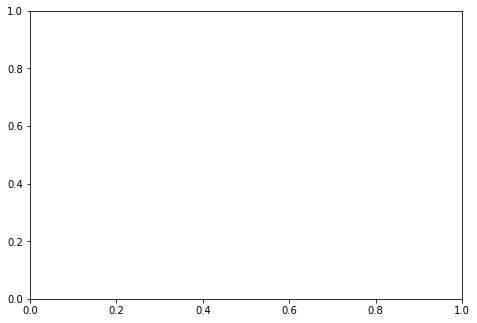

In [335]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)

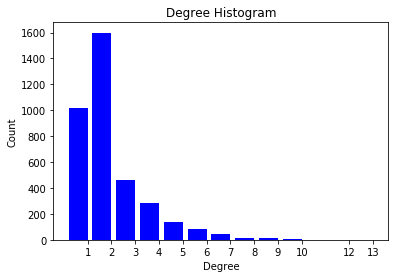

In [319]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


plt.show()

In [336]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(G), key=len)

# Create a subgraph of G consisting only of this component:
G2 = G.subgraph(largest_component)

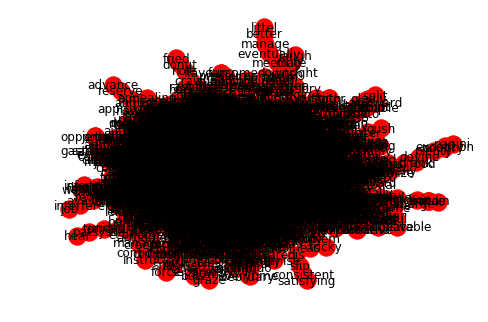

In [321]:
nx.draw(G2, with_labels=True)

In [337]:
sorted(G2.degree, key=lambda x: x[1], reverse=True)

[('de', 13),
 ('salad', 12),
 ('chocolate', 10),
 ('beef', 10),
 ('indian', 10),
 ('pizza', 10),
 ('street', 10),
 ('location', 10),
 ('lamb', 9),
 ('slightly', 9),
 ('tomato', 9),
 ('dark', 9),
 ('potato', 9),
 ('team', 9),
 ('le', 9),
 ('cook', 9),
 ('bottle', 9),
 ('egg', 9),
 ('chef', 9),
 ('point', 9),
 ('picture', 8),
 ('style', 8),
 ('rice', 8),
 ('sticky', 8),
 ('pork', 8),
 ('soft', 8),
 ('mint', 8),
 ('add', 8),
 ('pie', 8),
 ('heart', 8),
 ('pour', 8),
 ('desert', 8),
 ('present', 8),
 ('wonderful', 8),
 ('celebrate', 8),
 ('absolutely', 8),
 ('usually', 8),
 ('mushroom', 7),
 ('lobster', 7),
 ('n', 7),
 ('live', 7),
 ('large', 7),
 ('road', 7),
 ('save', 7),
 ('pancake', 7),
 ('short', 7),
 ('green', 7),
 ('manager', 7),
 ('kind', 7),
 ('rare', 7),
 ('tourist', 7),
 ('w', 7),
 ('window', 7),
 ('bill', 7),
 ('need', 7),
 ('outside', 7),
 ('despite', 7),
 ('mention', 7),
 ('company', 7),
 ('note', 7),
 ('culinary', 7),
 ('black', 7),
 ('crab', 7),
 ('decide', 7),
 ('setting',

In [323]:
# for w in words_df[words_df['count'] <5]['word'].tolist():
#     try:
#         G.remove_node(w)
#     except NetworkXError:
#         print (w)

position
clear
exactly
consistently
earth
enjoyable
tag
yesterday
optional
moroccan
agree
sunny
dissapointed
regularly
thought
frankly
burrito
solo
speciality
package
antipasti
tend
stk
unforgettable
faye
pp
october
hype
buddy
halfway
arabic
waiting
prim
indifferent
sulekha
overpriced
fair
sevilla
fortnight
worry
bomb
attentitive
katsu
ofcourse
favourable
rid
accord
dawdle
shock
ball
spain
sangria
relaxing
crave
heartbeat
echo
exelent
windy
hesitate
shocking
meantime
likewise
midwest
kensington
bourbon
bargirl
renata
research
flash
doorstep
pairing
generic
knife
orders
peppercorn
utterly
tiny
refilling
claim
dang
limeyard
allan
martin
acquire
appal
overwhelm
indecisive
nail
inattentive
rushed
haandi
rays
nostalgic
reliable
piccadilly
replenish
speedy
plentiful
abeno
udon
flavorful
grrrrreat
venture
slump
nontheless
nun
abundance
accident
afford
busaba
shower
somenthe
incredibile
mexicana
unlike
spotty
glamour
ja
tapa
epic
dialogue
macaroni
auntie
leisurely
lunchtime
vey
diabete
splitsv

In [338]:
G.size()
#13925 - with out removing common words

4285

In [339]:
len(G)
#1477 - with out removing common words

3666

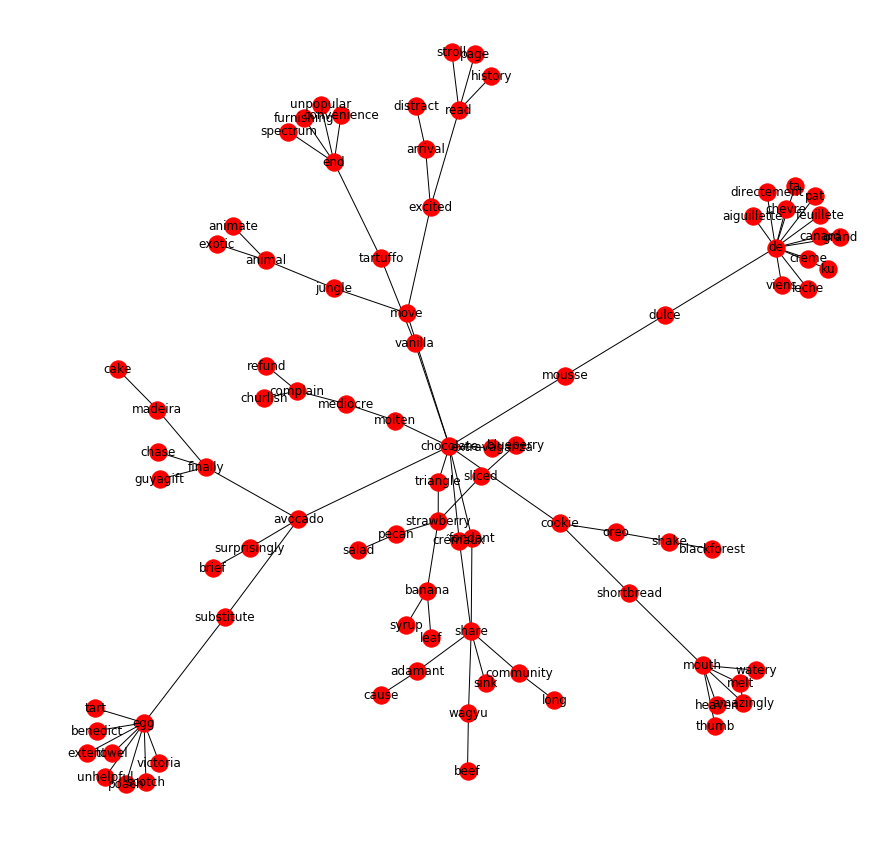

In [346]:
fig = plt.figure(figsize=(15,15))
plt.subplot(111)
sub_G1 = ego_graph(G2, "chocolate", 4, center=True, undirected=False)

nx.draw(sub_G1, with_labels=True)

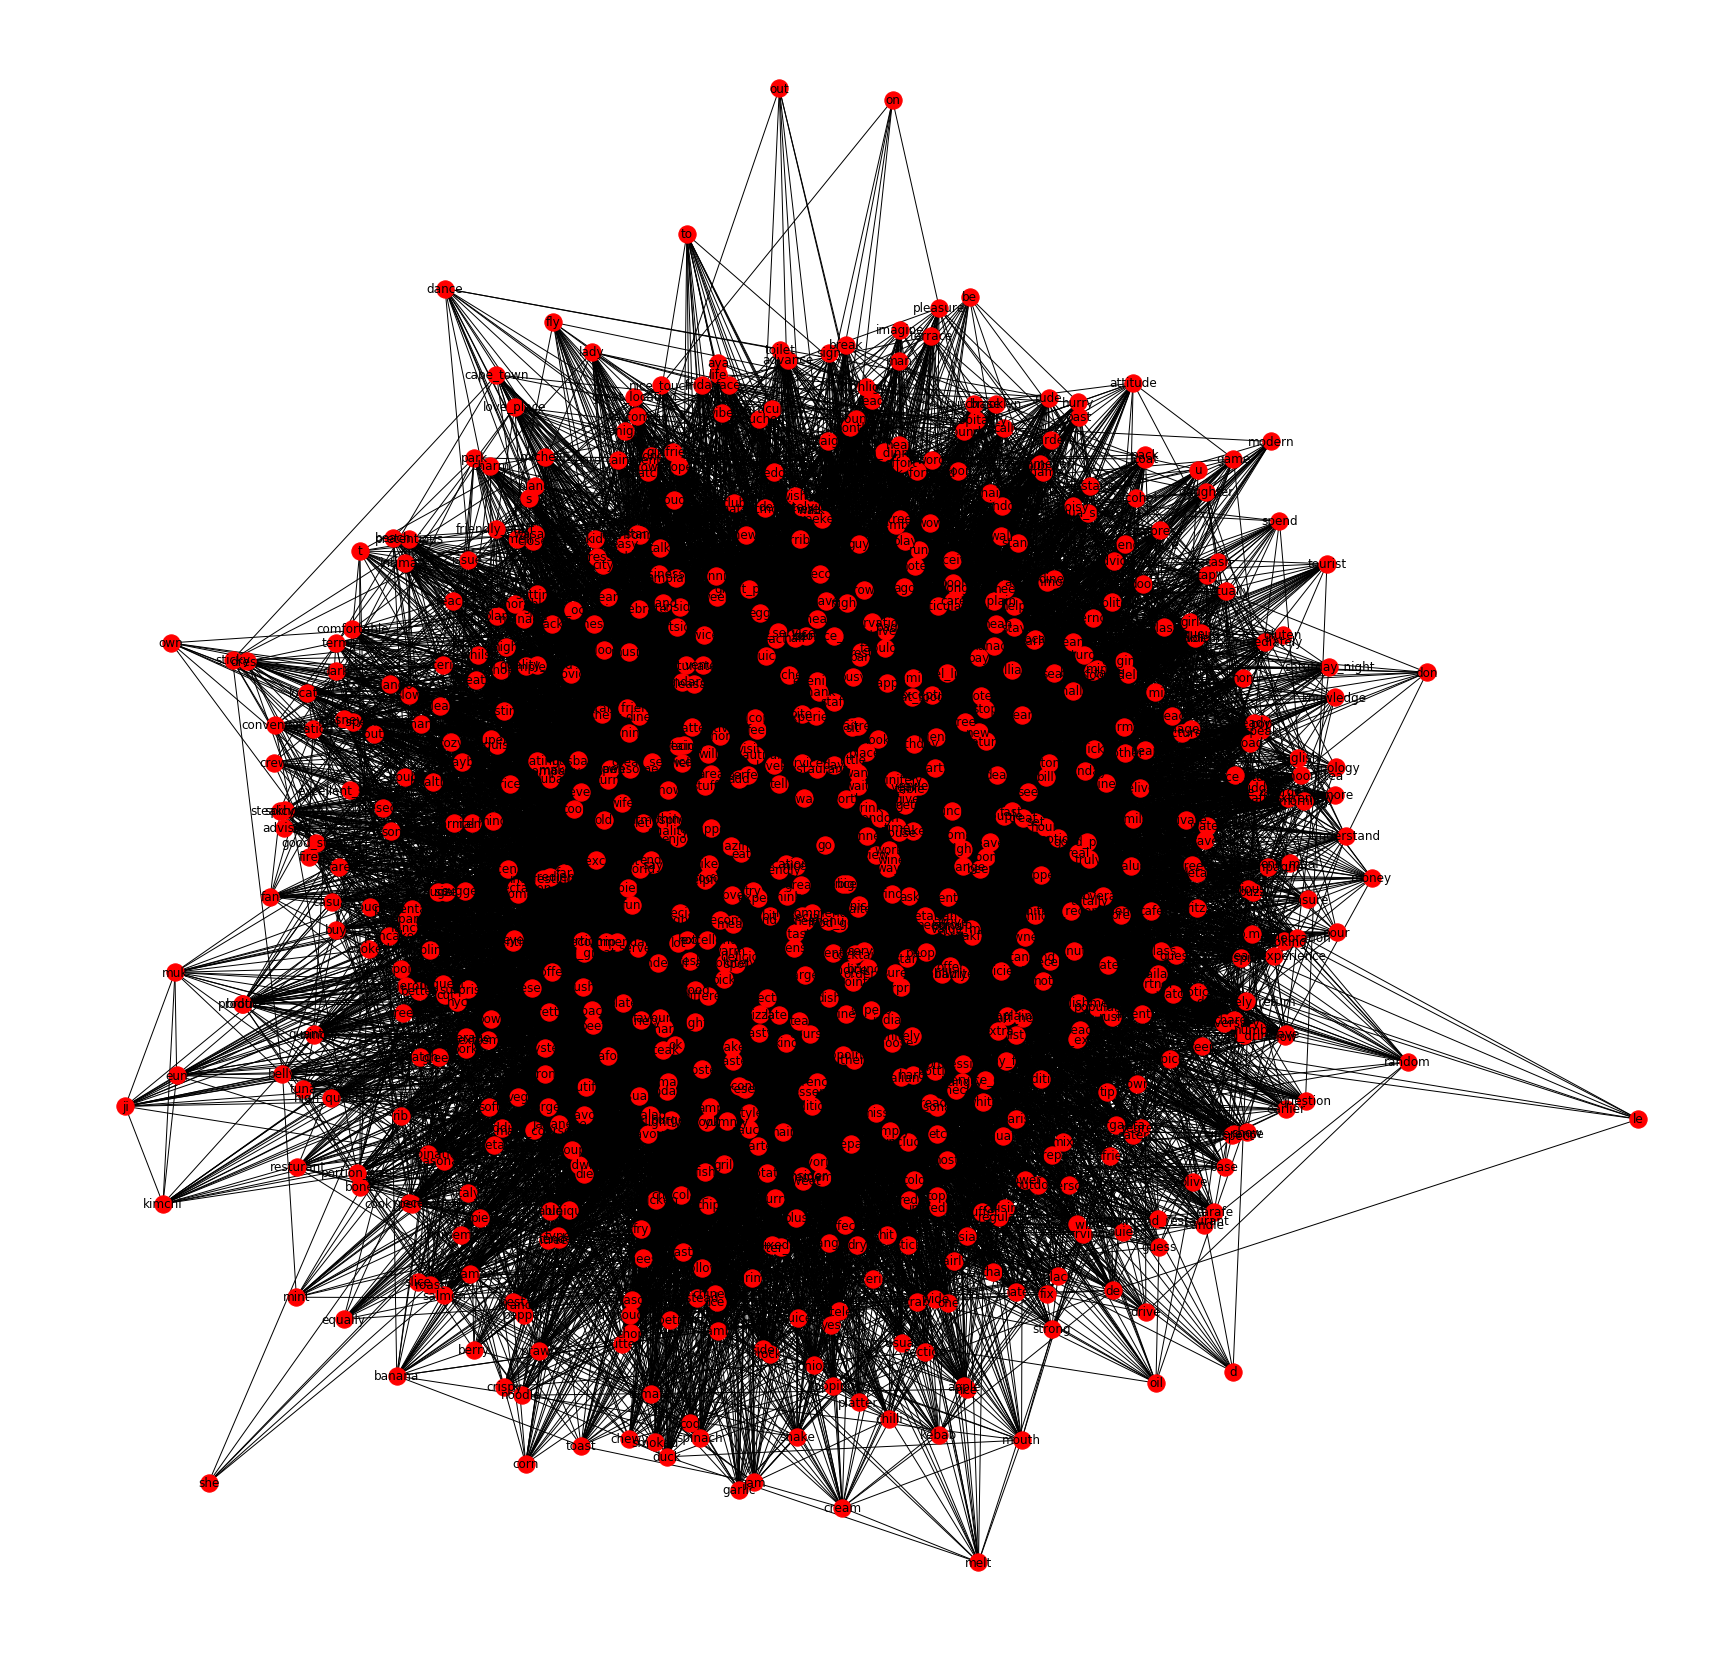

In [154]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G2 = ego_graph(G, "location", 2, center=True, undirected=False)

nx.draw(sub_G2, with_labels=True)

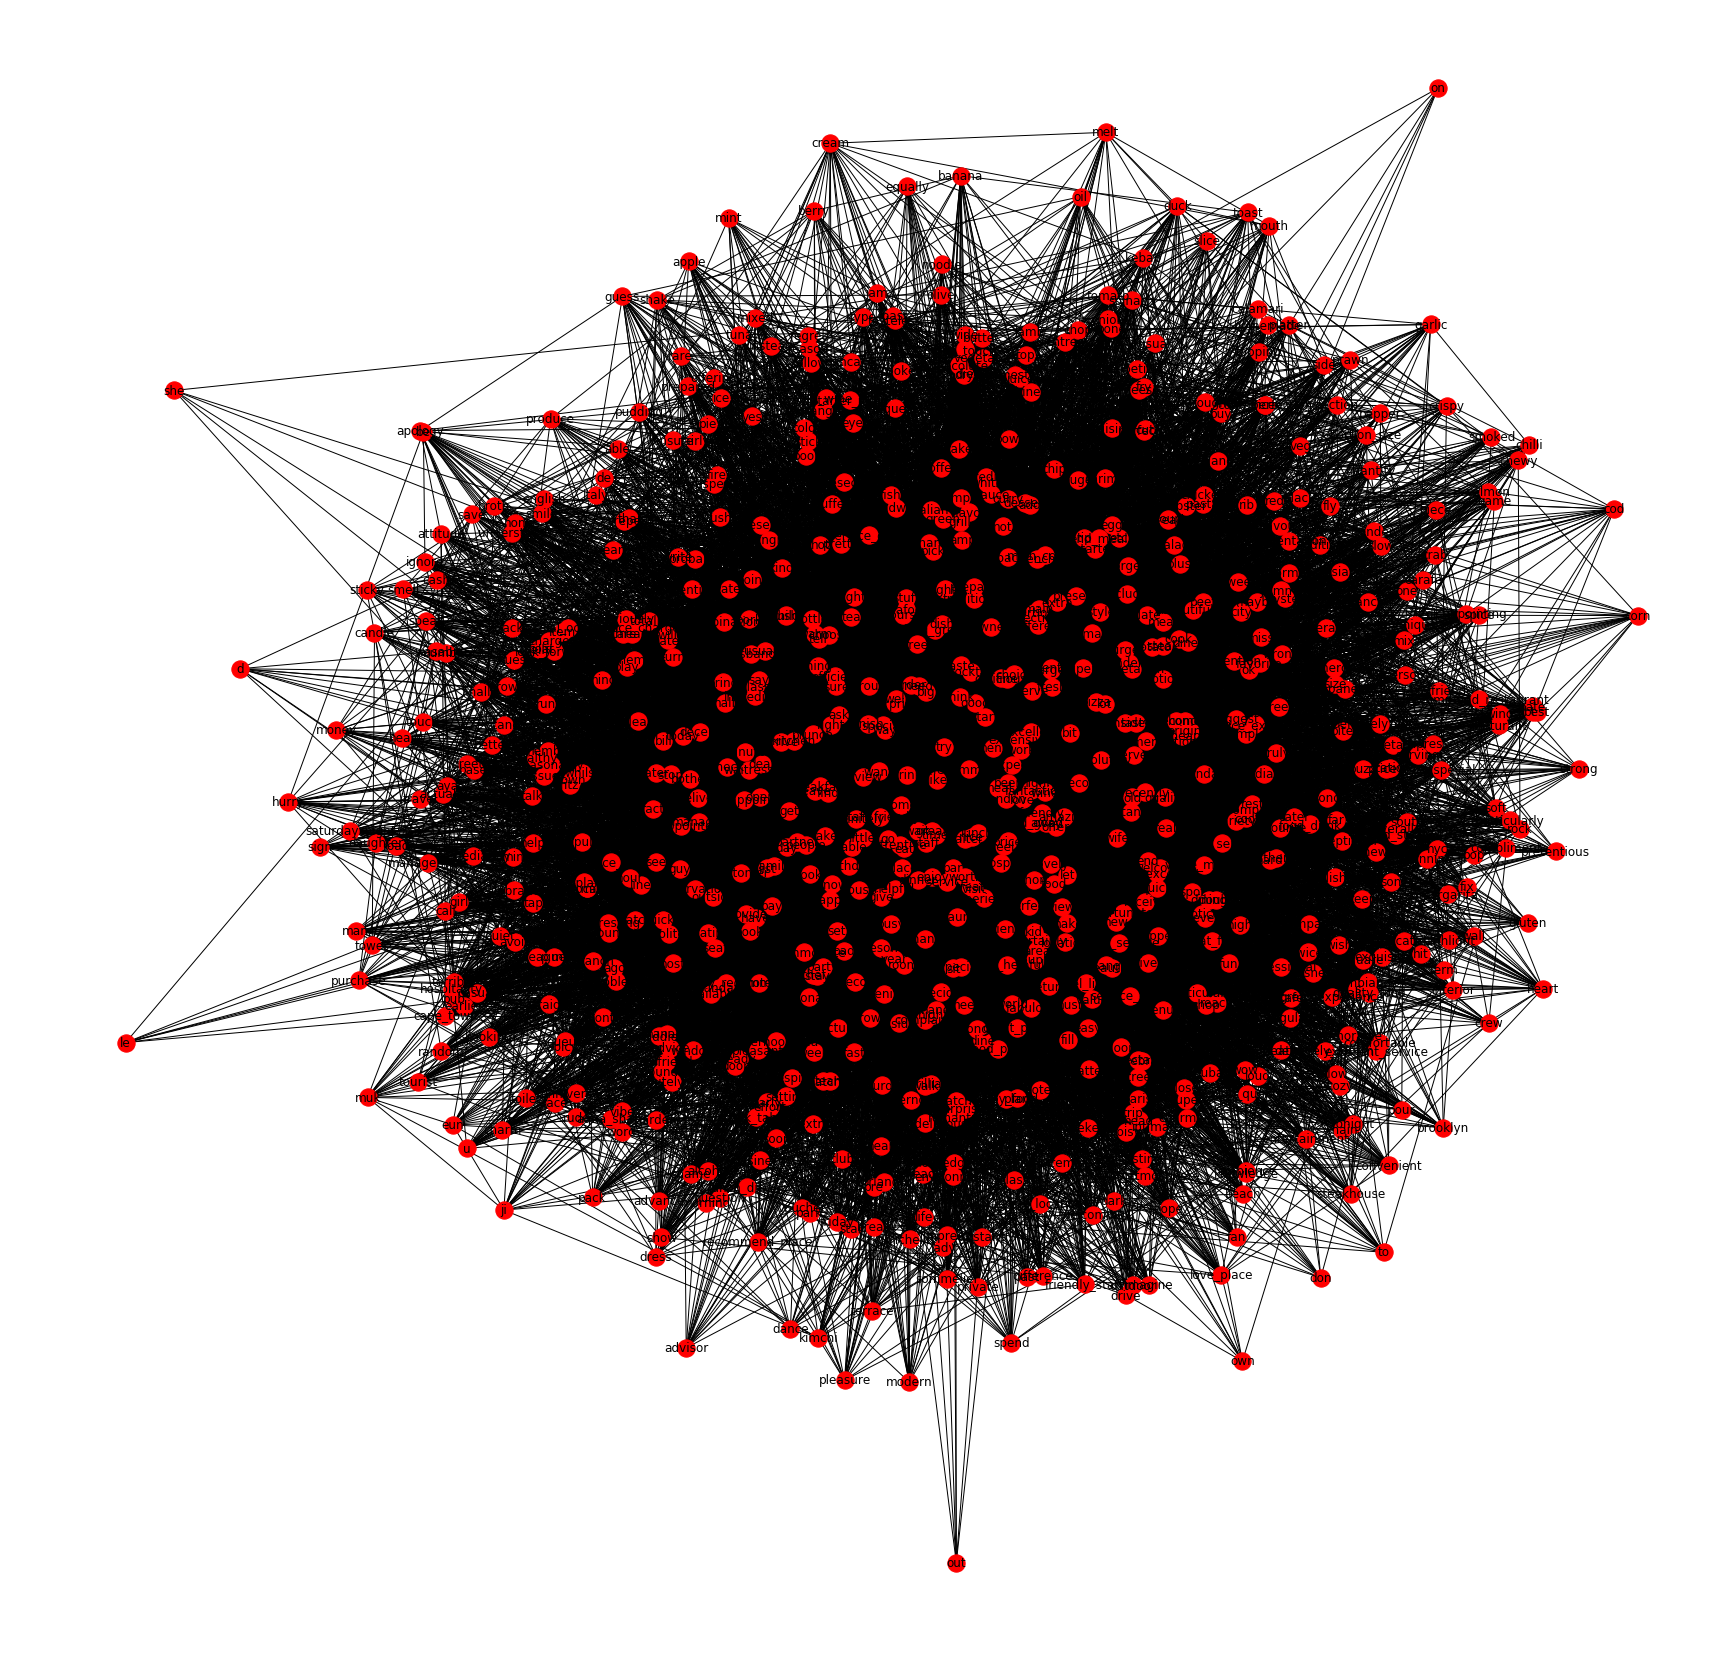

In [155]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G3 = ego_graph(G, "view", 2, center=True, undirected=False)

nx.draw(sub_G3, with_labels=True)

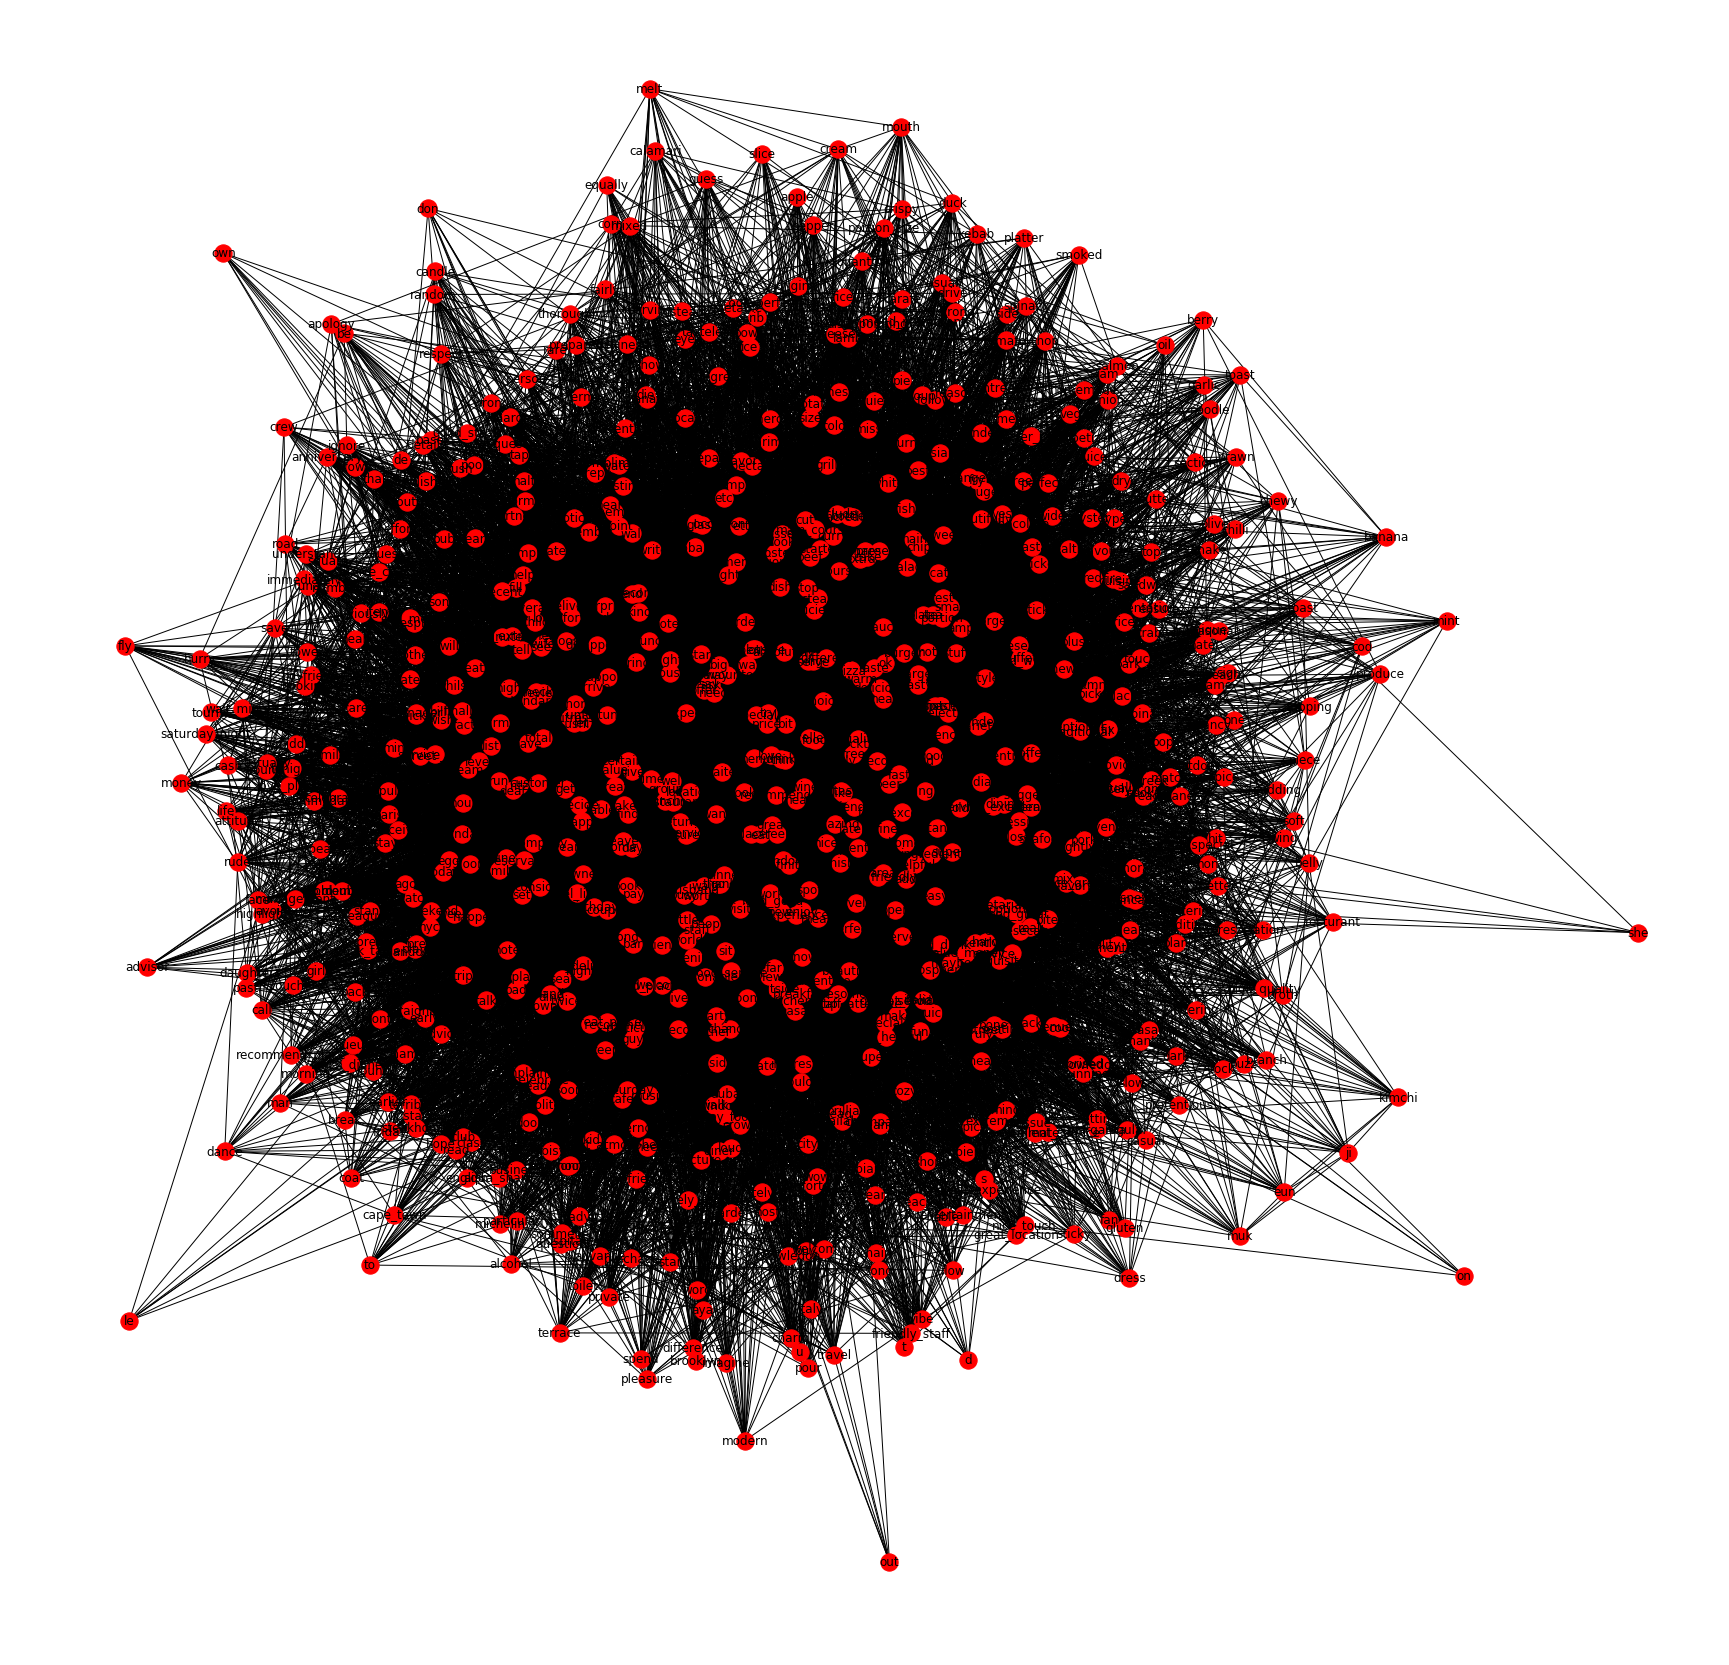

In [156]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G4 = ego_graph(G, "service", 2, center=True, undirected=False)

nx.draw(sub_G4, with_labels=True)

In [157]:
clust = chinese_whispers(sub_G1, weighting='top', iterations=20)

In [348]:
# Perform clustering of G
chinese_whispers(sub_G1, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G1).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

36	{'creme', 'viens', 'de', 'pat', 'feuillete', 'ku', 'leche', 'canard', 'aiguillette', 'grand', 'directement', 'ta', 'chevre'}

43	{'blackforest', 'heaven', 'shortbread', 'thumb', 'mouth', 'watery', 'oreo', 'shake', 'cookie'}

78	{'tart', 'unhelpful', 'victoria', 'towel', 'egg', 'benedict', 'extent', 'scotch', 'poach'}

1	{'mousse', 'chocolate', 'dulce', 'fondant', 'extravaganza', 'crémaux'}

47	{'unpopular', 'end', 'convenience', 'spectrum', 'furnishing'}

70	{'cake', 'finally', 'madeira', 'chase', 'guyagift'}

49	{'strawberry', 'pecan', 'triangle', 'salad'}

11	{'wagyu', 'sink', 'share', 'beef'}

22	{'history', 'page', 'stroll', 'read'}

3	{'refund', 'churlish', 'complain'}

81	{'move', 'jungle', 'excited'}

4	{'animal', 'animate', 'exotic'}

64	{'banana', 'syrup', 'leaf'}

2	{'tartuffo', 'vanilla'}

68	{'avocado', 'substitute'}

14	{'distract', 'arrival'}

18	{'brief', 'surprisingly'}

71	{'melt', 'amazingly'}

69	{'sliced', 'blueberry'}

27	{'community

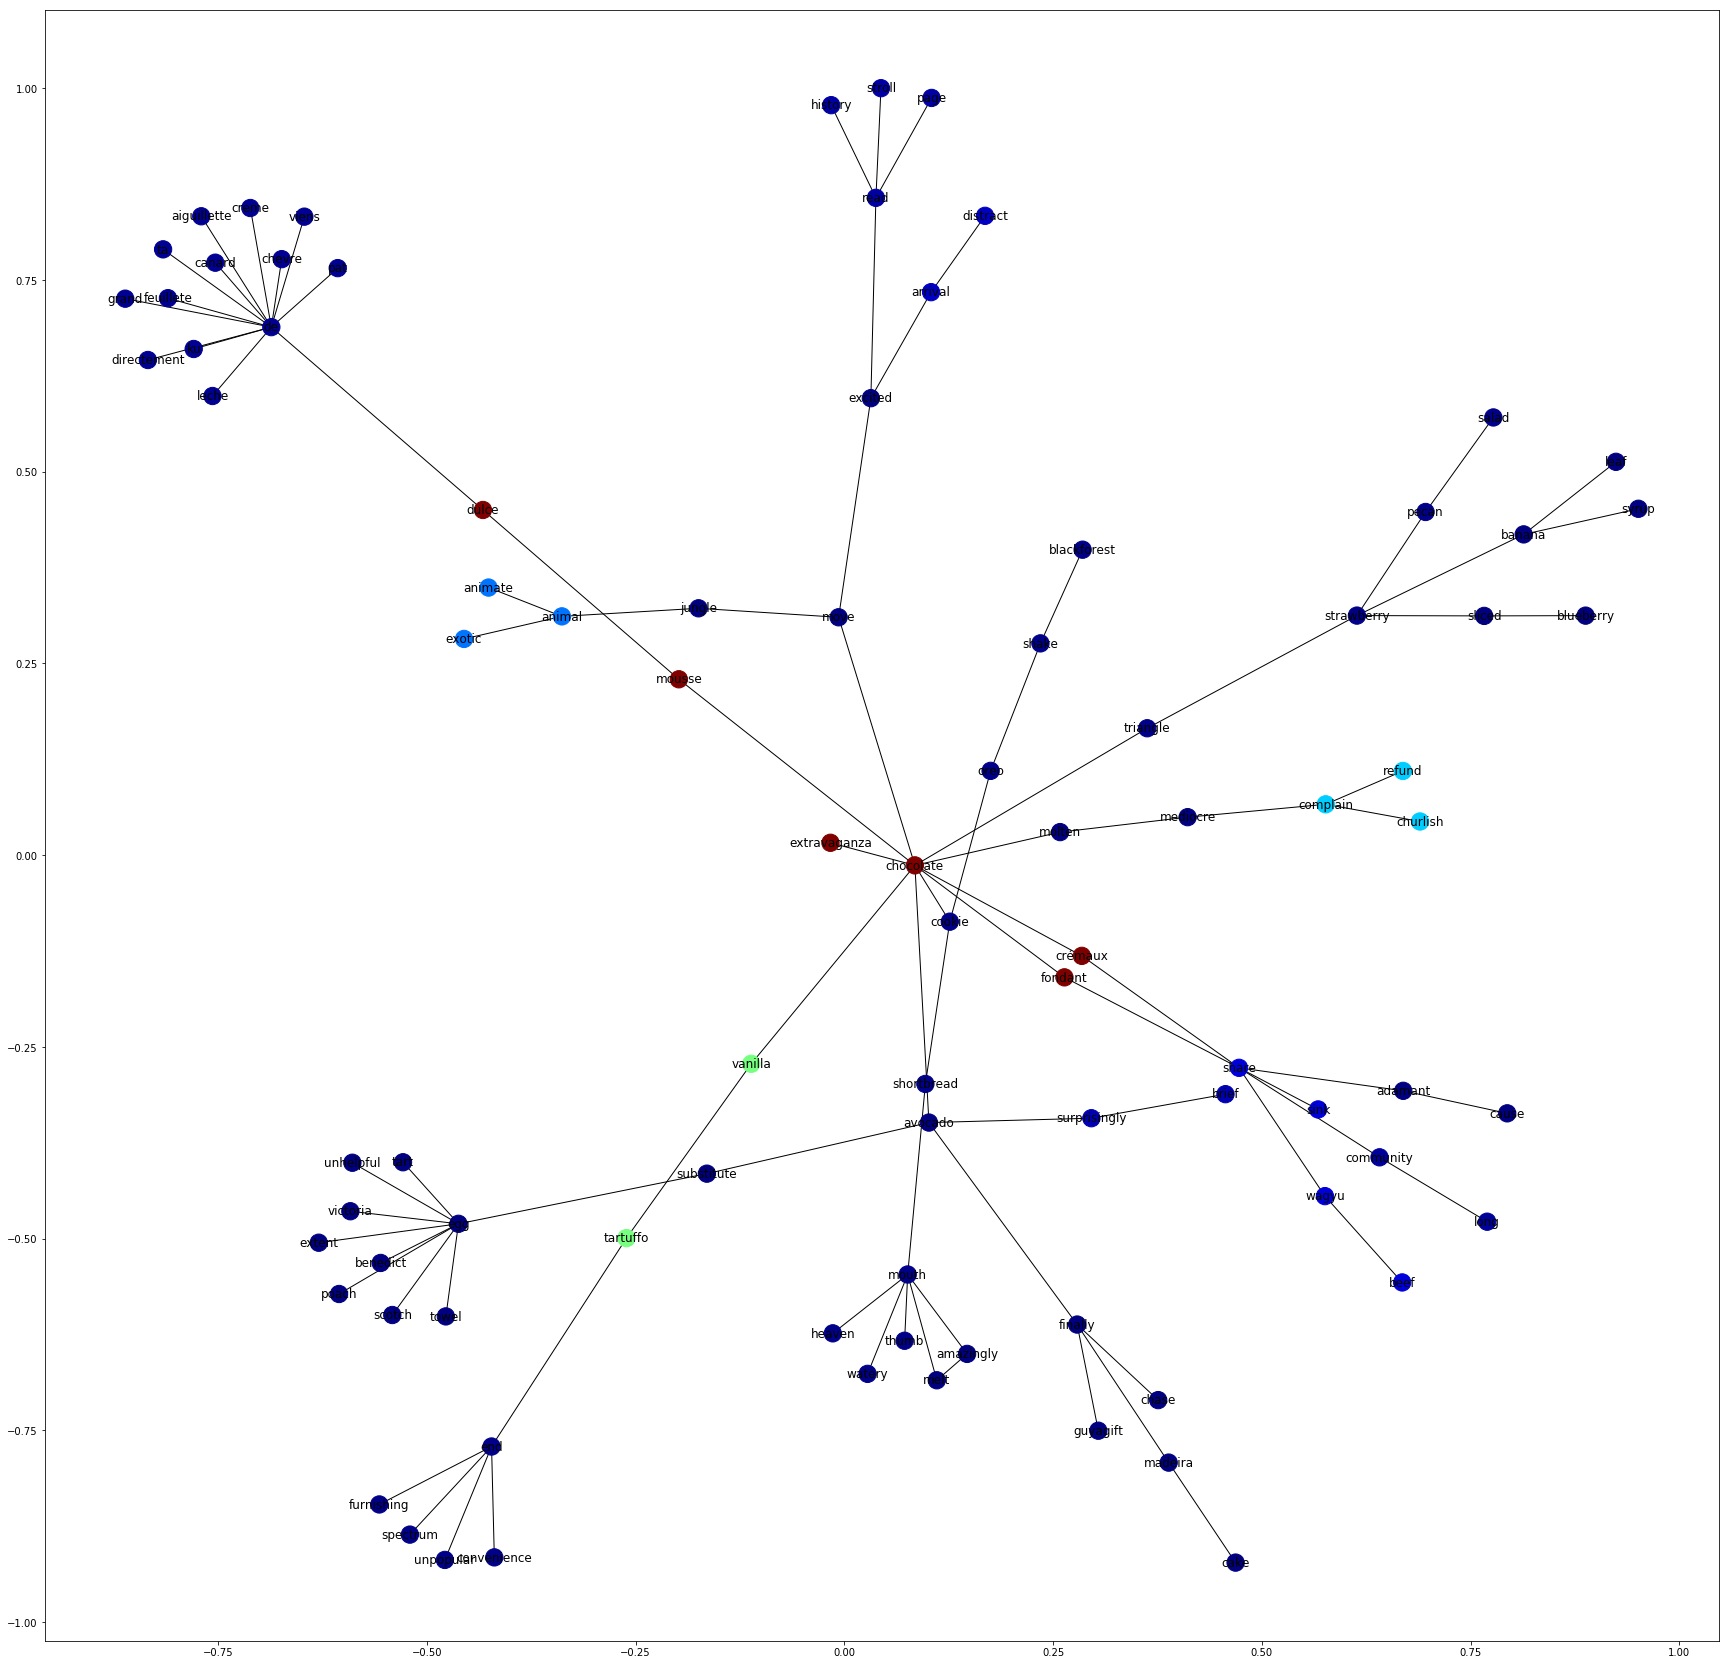

In [349]:
# Visualize the clustering of G using NetworkX (requires matplotlib)
colors = [1. / sub_G1.node[node]['label'] for node in sub_G1.nodes()]
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)

nx.draw_networkx(sub_G1,cmap=plt.get_cmap('jet'), node_color=colors, font_color='black')

plt.show()

NodeNotFound: Source foie_gra is not in G

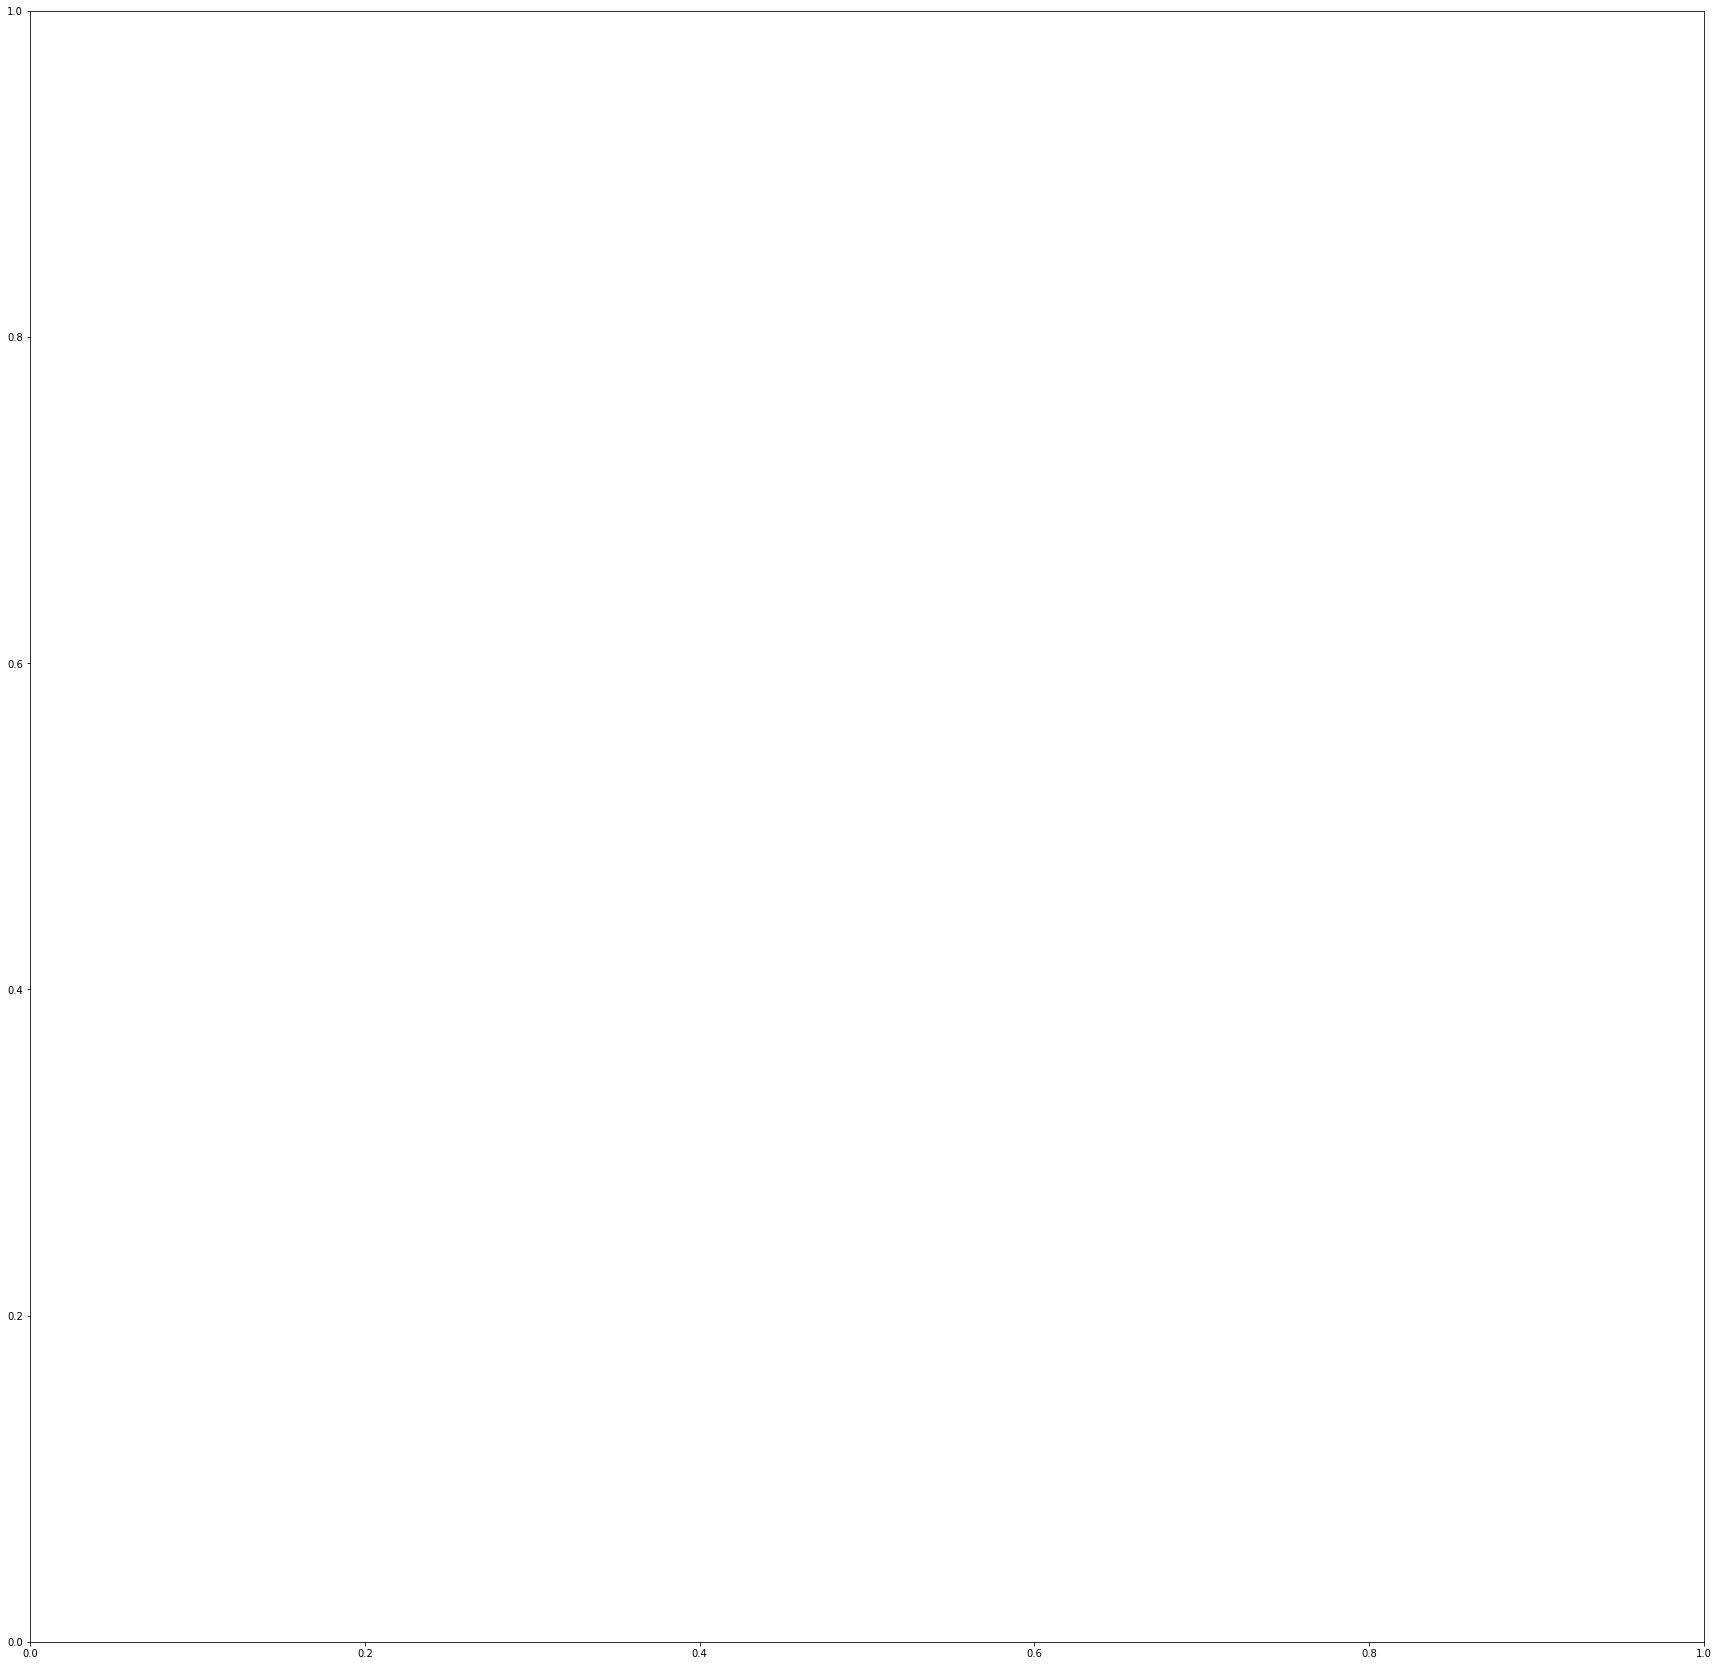

In [160]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G5 = ego_graph(G2, "foie_gra", 2, center=True, undirected=False)

nx.draw(sub_G5, with_labels=True)

In [ ]:
# Perform clustering of G
chinese_whispers(sub_G5, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G5).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

In [ ]:
# Visualize the clustering of G using NetworkX (requires matplotlib)
colors = [1. / sub_G5.node[node]['label'] for node in sub_G5.nodes()]
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)

nx.draw_networkx(sub_G5, cmap=plt.get_cmap('jet'), node_color=colors, font_color='black')

plt.show()